# 0. Imagen para analizar

--2025-06-17 01:52:54--  https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236710 (231K) [image/jpeg]
Saving to: ‘traffic-jam-getty.jpg’

traffic-jam-getty.j 100%[===================>] 231.16K  --.-KB/s    in 0.02s   

2025-06-17 01:52:55 (9.66 MB/s) - ‘traffic-jam-getty.jpg’ saved [236710/236710]



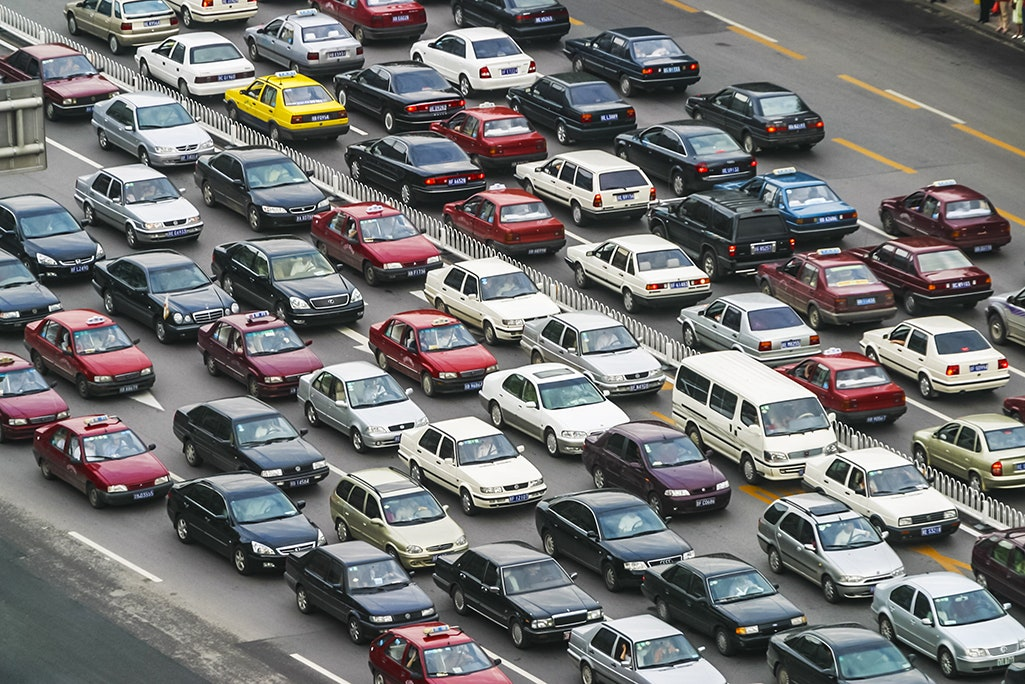

In [3]:
!wget -O traffic-jam-getty.jpg https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg

from PIL import Image
imagen = Image.open("traffic-jam-getty.jpg")
imagen

# 1. Detección de objetos con YOLO



In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [5]:
from ultralytics import YOLO
import numpy as np

def detectar_objetos_yolo(imagen):
    """
    Detecta objetos en una imagen usando YOLOv8.
    Retorna las bounding boxes, clases y scores.
    """
    # Cargar el modelo pre-entrenado
    modelo = YOLO('yolov8n.pt')  # 'n' es el modelo más ligero, se puede usar 's', 'm', 'l' para más precisión

    if not isinstance(imagen, np.ndarray):
        imagen_np = np.array(imagen)
    else:
        imagen_np = imagen

    # Realizar la inferencia
    resultados = modelo(imagen_np)

    # Extraer información de los resultados
    boxes = []
    clases = []
    scores = []
    for r in resultados:
        for box, cls, score in zip(r.boxes.xyxy.cpu().numpy(), r.boxes.cls.cpu().numpy(), r.boxes.conf.cpu().numpy()):
            boxes.append(box)      # [x1, y1, x2, y2]
            clases.append(int(cls))
            scores.append(float(score))

    return boxes, clases, scores

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Detectar objetos
boxes, clases, scores = detectar_objetos_yolo(imagen)

# Mostrar resultados de ejemplo
print("Número de objetos detectados:", len(boxes))
print("Primeras 2 clases detectadas:", clases[:2])

100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]



0: 448x640 63 cars, 1 bus, 43.3ms
Speed: 28.6ms preprocess, 43.3ms inference, 320.8ms postprocess per image at shape (1, 3, 448, 640)
Número de objetos detectados: 64
Primeras 2 clases detectadas: [2, 2]


In [27]:
import cv2
import matplotlib.pyplot as plt

def visualizar_bounding_boxes(imagen, boxes, clases, scores):
  # Cargar nombres de clases COCO (80 clases)
  COCO_CLASSES = [
      'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
      'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
      'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
      'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
      'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
      'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
      'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
      'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
      'hair drier', 'toothbrush'
  ]

  # Convertir imagen a formato OpenCV (BGR)
  img_cv = cv2.cvtColor(np.array(imagen), cv2.COLOR_RGB2BGR)

  # Dibujar cajas y etiquetas
  for box, cls, score in zip(boxes, clases, scores):
      x1, y1, x2, y2 = map(int, box)
      color = (0, 255, 0)
      cv2.rectangle(img_cv, (x1, y1), (x2, y2), color, 2)
      label = f"{COCO_CLASSES[cls]}: {score:.2f}"
      cv2.putText(img_cv, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

  # Convertir de nuevo a RGB para mostrar con matplotlib
  img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(12,8))
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.title('Detección de objetos con YOLOv8')
  plt.show()

  print(f"Objetos detectados: {len(boxes)}")
  clases_detectadas = set([COCO_CLASSES[c] for c in clases])
  print(f"Clases detectadas: {clases_detectadas}")

# 2. Segmentación con SAM

In [9]:
# Instalar Segment Anything de Meta AI
!git clone https://github.com/facebookresearch/segment-anything
%cd segment-anything
!pip install -q -e .

# Instalar opencv y matplotlib si no están
!pip install -q opencv-python matplotlib

# Descargar un modelo SAM preentrenado (ej: vit_b)
!wget -O sam_vit_b.pth https://huggingface.co/segments-arnaud/sam_vit_b/resolve/f38484d6934e5d2b555b1685d22d676236455685/sam_vit_b_01ec64.pth

Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 19.51 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything
  Preparing metadata (setup.py) ... done
--2025-06-17 02:00:18--  https://huggingface.co/segments-arnaud/sam_vit_b/resolve/f38484d6934e5d2b555b1685d22d676236455685/sam_vit_b_01ec64.pth
Resolving huggingface.co (huggingface.co)... 18.164.174.23, 18.164.174.118, 18.164.174.55, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/e0/14/e014730fad45631a5eee6cafd906306f7ff621feae161f1bb48d3cc328f3bfd0/ec2df62732614e57411cdcf32a23ffdf28910380d03139ee0f4fcbe91eb8c912?response-content-disposition=inline%3B+filena

In [37]:
from ultralytics import YOLO
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor

def segmentar_con_sam(imagen, boxes, show=False):
  # === CONFIGURACIÓN DEL MODELO SAM ===
  SAM_CHECKPOINT_PATH = "./sam_vit_b.pth"
  MODEL_TYPE = "vit_b"

  device = "cuda" if torch.cuda.is_available() else "cpu"
  sam = sam_model_registry[MODEL_TYPE](checkpoint=SAM_CHECKPOINT_PATH)
  sam.to(device)
  predictor = SamPredictor(sam)

  # === PREPARAR IMAGEN PARA SAM ===
  imagen_np = np.array(imagen)
  imagen_rgb = cv2.cvtColor(imagen_np, cv2.COLOR_BGR2RGB)

  predictor.set_image(imagen_rgb)

  # Convertir cajas al formato SAM (XYWH normalizado)
  input_boxes = np.array(boxes)  # ya están en formato xyxy
  input_boxes = torch.tensor(input_boxes, device=device)

  # Obtener máscaras a partir de las cajas
  masks, _, _ = predictor.predict_torch(
      point_coords=None,
      point_labels=None,
      boxes=input_boxes,
      multimask_output=False  # solo una máscara por caja
  )


  output_image = imagen_rgb.copy()
  for mask in masks:
      mask_np = mask[0].cpu().numpy().astype(np.uint8)
      contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      cv2.drawContours(output_image, contours, -1, (0, 153, 255), thickness=2)

  plt.figure(figsize=(12, 8))
  plt.imshow(output_image)
  plt.axis('off')
  plt.title("Segmentación con SAM usando bounding boxes de YOLO")
  if show:
    plt.show()

  return masks


# 3. Estimación de Profundidad con MiDaS

In [12]:
!pip install torch torchvision matplotlib opencv-python

In [13]:
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
!wget https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg -O traffic.jpg
imagen = Image.open("traffic.jpg")

--2025-06-17 02:01:25--  https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236710 (231K) [image/jpeg]
Saving to: ‘traffic.jpg’

traffic.jpg         100%[===================>] 231.16K  --.-KB/s    in 0.02s   

2025-06-17 02:01:25 (9.53 MB/s) - ‘traffic.jpg’ saved [236710/236710]



In [15]:
def estimar_profundidad_midas(imagen, model_type="DPT_Hybrid"):
    # Cargar el modelo y las transformaciones
    midas = torch.hub.load("intel-isl/MiDaS", model_type, trust_repo='check')

    # Seleccionar dispositivo (GPU si está disponible)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    midas.to(device)
    midas.eval()

    # Cargar transformaciones adecuadas para el modelo
    midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

    if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
        transform = midas_transforms.dpt_transform
    else:
        transform = midas_transforms.small_transform

    # Convertir PIL Image a numpy array y luego a BGR (OpenCV format)
    img = np.array(imagen)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Aplicar transformaciones y mover a dispositivo
    input_batch = transform(img).to(device)

    # Predecir profundidad
    with torch.no_grad():
        prediction = midas(input_batch)

        # Redimensionar a la resolución original
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    # Mover a CPU y convertir a numpy
    depth_map = prediction.cpu().numpy()

    return depth_map

In [30]:
def visualizar_mapa_calor(imagen):
  # Estimar profundidad
  depth_map = estimar_profundidad_midas(imagen)

  # Mostrar la imagen original y el mapa de profundidad
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(imagen)
  plt.title("Imagen Original")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(depth_map, cmap='plasma')
  plt.title("Mapa de Profundidad")
  plt.axis('off')

  plt.show()

# 4. Visualización Combinada

--2025-06-17 02:25:34--  https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236710 (231K) [image/jpeg]
Saving to: ‘traffic-jam-getty.jpg’

traffic-jam-getty.j 100%[===================>] 231.16K  --.-KB/s    in 0.02s   

2025-06-17 02:25:34 (10.0 MB/s) - ‘traffic-jam-getty.jpg’ saved [236710/236710]



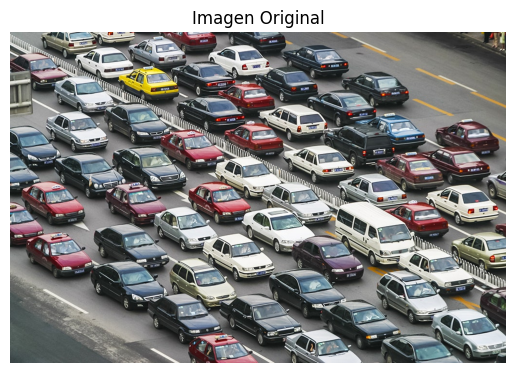

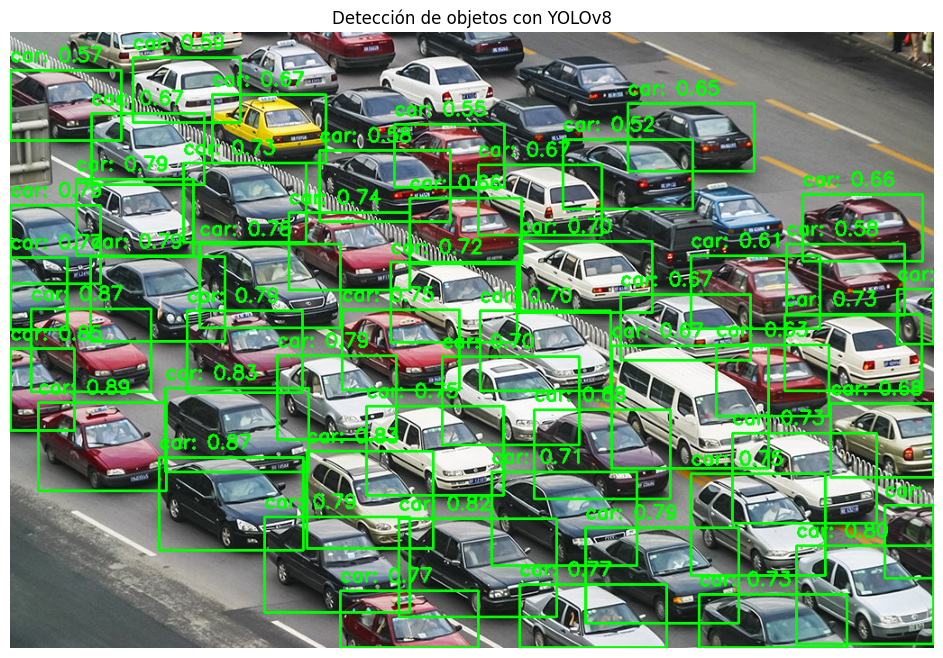

Objetos detectados: 52
Clases detectadas: {'car'}


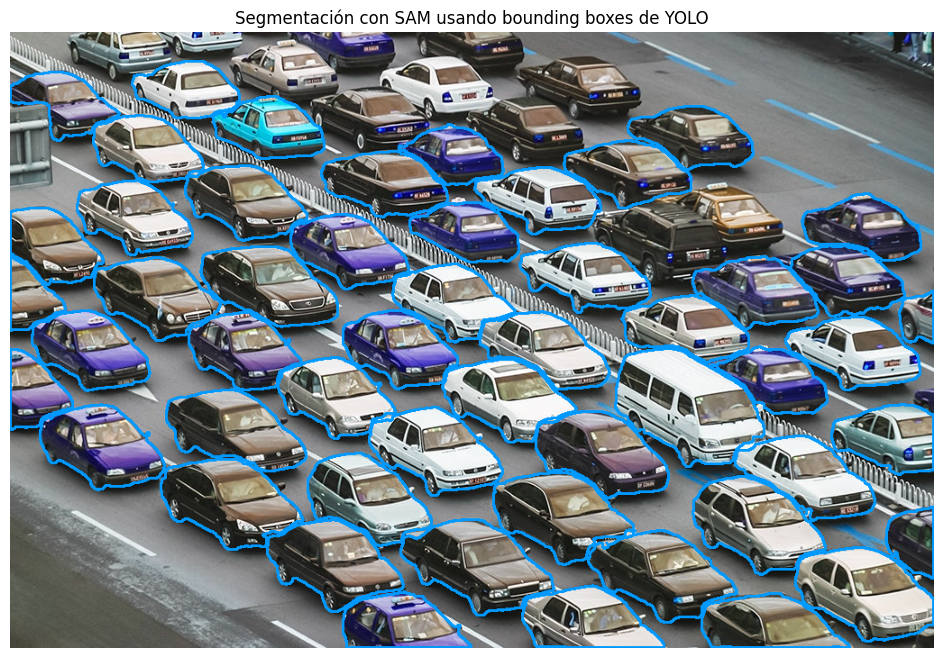

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


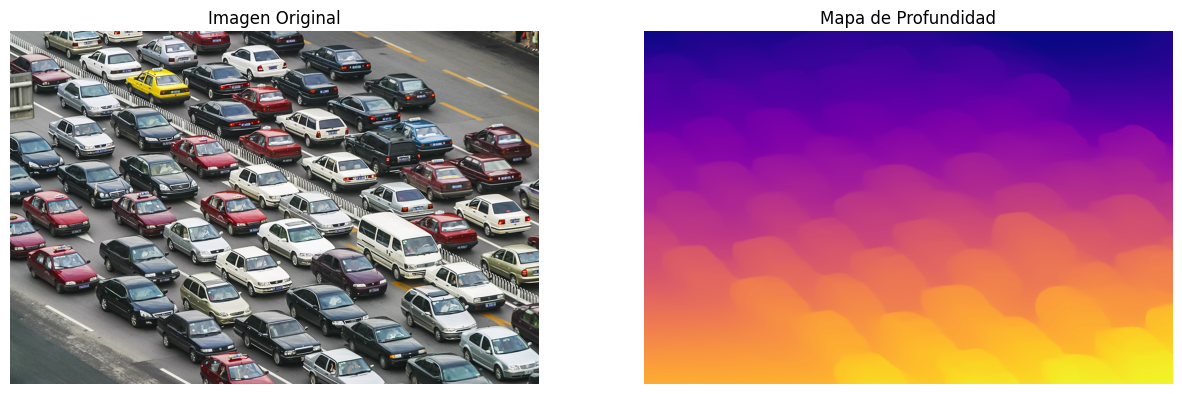

In [36]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image



# VISUALIZAR IMAGEN ORIGINAL

!wget -O traffic-jam-getty.jpg https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg
imagen = Image.open("traffic-jam-getty.jpg")
plt.imshow(imagen)
plt.axis("off")
plt.title("Imagen Original")
plt.show()

# VISUALIZAR BOUNDING BOXES YOLO
visualizar_bounding_boxes(imagen, boxes, clases, scores)

# VISUALIZAR SEGMENTACIÓN CON SAM
segmentar_con_sam(imagen, boxes, show=True)

# VISUALIZAR MAPA DE CALOR
visualizar_mapa_calor(imagen)

# 5. Aplicación Analitica o Creativa

In [42]:
def pixelar_fondo(imagen, masks, nivel_pixelado=10):
    """
    Aplica pixelado al fondo de la imagen, conservando sin alterar las regiones segmentadas.

    Parámetros:
    - imagen: imagen original (PIL o NumPy array)
    - masks: tensor de máscaras (T, H, W) como salida de segmentar_con_sam
    - nivel_pixelado: nivel de reducción para el pixelado (mayor = más pixelado)

    Retorna:
    - imagen con el fondo pixelado y los objetos segmentados preservados.
    """
    if isinstance(imagen, Image.Image):
        imagen = np.array(imagen)

    if imagen.ndim == 2:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
    elif imagen.shape[2] == 4:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_RGBA2BGR)

    # Convertir la imagen a RGB si está en BGR
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Unir todas las máscaras en una sola
    mascara_union = torch.any(masks.squeeze(1), dim=0).cpu().numpy().astype(np.uint8)

    # Crear imagen pixelada
    h, w = imagen_rgb.shape[:2]
    imagen_reducida = cv2.resize(imagen_rgb, (w // nivel_pixelado, h // nivel_pixelado), interpolation=cv2.INTER_LINEAR)
    imagen_pixelada = cv2.resize(imagen_reducida, (w, h), interpolation=cv2.INTER_NEAREST)

    # Crear máscara inversa para aplicar pixelado solo al fondo
    fondo_mask = (1 - mascara_union).astype(bool)

    # Combinar imagen original y pixelada
    imagen_resultante = imagen_rgb.copy()
    imagen_resultante[fondo_mask] = imagen_pixelada[fondo_mask]

    # Mostrar imagen final
    plt.figure(figsize=(12, 8))
    plt.imshow(imagen_resultante)
    plt.axis('off')
    plt.title("Fondo pixelado, objetos preservados")
    plt.show()

    return imagen_resultante



0: 448x640 63 cars, 1 bus, 20.7ms
Speed: 3.9ms preprocess, 20.7ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


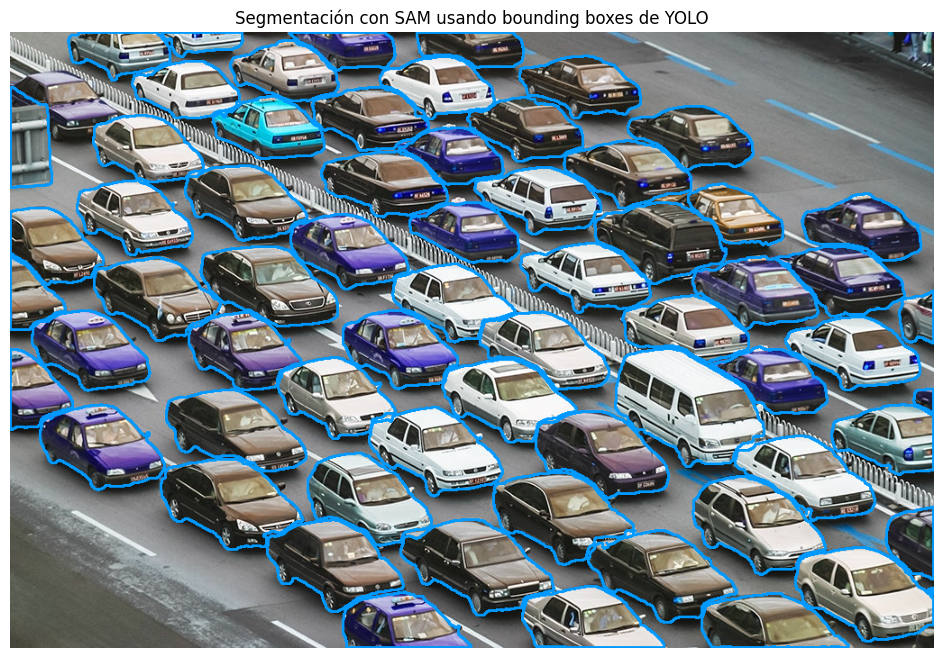

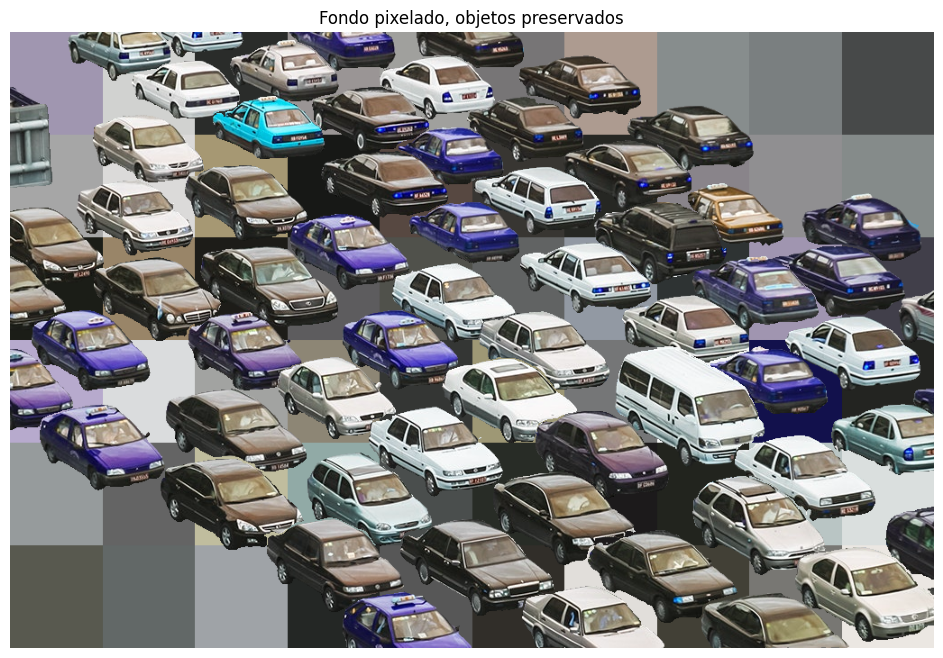

In [43]:
imagen = Image.open("traffic-jam-getty.jpg")

# Paso 1: Detección
boxes, clases, scores = detectar_objetos_yolo(imagen)

# Paso 2: Segmentación
masks = segmentar_con_sam(imagen, boxes)

# Paso 3: Pixelado del fondo
resultado = pixelar_fondo(imagen, masks, nivel_pixelado=100)
